In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [8]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(32)
tf.random.set_seed(32)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [15]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [16]:
model_history = model.fit(X_train, y_train, epochs=50,batch_size= 64,
                    validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 22s 24ms/step - loss: 0.8615 - accuracy: 0.7051 - val_loss: 0.6128 - val_accuracy: 0.7676
Epoch 2/50
860/860 [==============================] - 20s 24ms/step - loss: 0.5312 - accuracy: 0.8075 - val_loss: 0.4966 - val_accuracy: 0.8298
Epoch 3/50
860/860 [==============================] - 20s 23ms/step - loss: 0.4750 - accuracy: 0.8280 - val_loss: 0.4773 - val_accuracy: 0.8282
Epoch 4/50
860/860 [==============================] - 20s 23ms/step - loss: 0.4368 - accuracy: 0.8431 - val_loss: 0.4187 - val_accuracy: 0.8528
Epoch 5/50
860/860 [==============================] - 20s 24ms/step - loss: 0.4113 - accuracy: 0.8518 - val_loss: 0.4159 - val_accuracy: 0.8514
Epoch 6/50
860/860 [==============================] - 20s 23ms/step - loss: 0.3931 - accuracy: 0.8584 - val_loss: 0.3723 - val_accuracy: 0.8694
Epoch 7/50
860/860 [==============================] - 26s 30ms/step - loss: 0.3767 - accuracy: 0.8654 - val_loss: 0.3915 - val_accuracy:

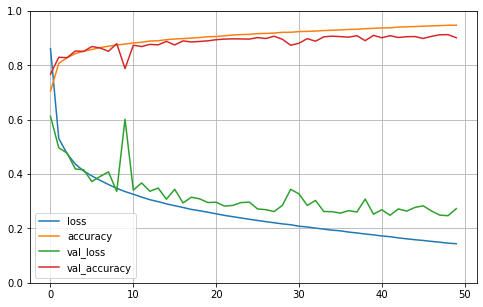

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2893 - accuracy: 0.8972


In [19]:
ev

[0.289337694644928, 0.8971999883651733]

In [20]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

1/1 [==============================] - 0s 174ms/step


array([9, 2, 1], dtype=int64)